# Exercise A-1: Transformations for Orthogonality

We consider some linear (or affine) mappings, each represented by a coefficient matrix 
$A : \mathbb{R}^2 \to \mathbb{R}^2$ or $A : \mathbb{R}^3 \to \mathbb{R}^3$ 
(with respect to Cartesian coordinates $(x, y, [z])$).

Provide the coefficient matrix $A$ for the following (geometrically specified) mappings. 
Which of these mappings are orthogonal?

1. $A : \mathbb{R}^2 \to \mathbb{R}^2$: Rotation by the angle $\phi = +\pi/2$ 
    (i.e., $90^\circ$ counterclockwise).
2.  $A : \mathbb{R}^2 \to \mathbb{R}^2$: Rotation by the angle $\phi = -\pi/4$ 
    (i.e., $45^\circ$ clockwise).
3.  $A : \mathbb{R}^2 \to \mathbb{R}^2$: Orthogonal projection onto the diagonal 
    $(x = y)$.
4.  $A : \mathbb{R}^3 \to \mathbb{R}^3$: Orthogonal reflection about the plane defined 
    by the equation $x = 1$.
    
    **Note:** (4) is an exception: This mapping is not linear since it does not map 
    
    $(0, 0, 0)$ to $(0, 0, 0)$. It is an affine transformation of the form $A \cdot (x, y, z)^T + b$. 
    
    What is the matrix $A$ and the vector $b$?
    
5. $A : \mathbb{R}^3 \to \mathbb{R}^3$: $(x, y, z)^T$ is mapped to $(z, y/2, x/3)^T$.


In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix, Rational, Identity, Transpose, Eq, init_printing, symbols, latex, det, pi, cos, sin
from sympy.abc import A
from IPython.display import display, Math

In [2]:
# Pre-requisites for pretty printing
init_printing()

In [3]:
# Function to format matrices dynamically for LaTeX
def format_matrix(name, matrix):
    return f"{name} = " + latex(matrix)
# Function to format determinants dynamically for LaTeX
def format_determinant(name, determinant):
    return f"\\det({name}) = " + latex(determinant)
# Function to format vectors dynamically for LaTeX
def format_vector(name, vector):
    return f"{name} = " + latex(vector)
def format_dot_product(name, matrix1: Matrix, matrix2: Matrix):
    result = matrix1 * matrix2
    # Start LaTeX formatting
    latex_str = f"{name} = \\begin{{bmatrix}}\n"
    # Iterate over the result matrix to format each cell
    for i in range(result.rows):
        row_operations = []
        for j in range(result.cols):
            terms = []
            for k in range(matrix1.cols):
                terms.append(f"{latex(matrix1[i, k])} \\cdot {latex(matrix2[k, j]) if matrix2.shape[1] > 1 else latex(matrix2[k])}")
            operation = " + ".join(terms)
            row_operations.append(f"({operation})")
        latex_str += " & ".join(row_operations) + " \\\\\n"

    latex_str += "\\end{bmatrix} = " + latex(result)
    return result, latex_str

----

# Solution for 1)

$A : \mathbb{R}^2 \to \mathbb{R}^2$: Rotation by the angle $\phi = +\pi/2$ 
    (i.e., $90^\circ$ counterclockwise).

The rotation matrix in $\mathbb{R}^2$ for an angle $\phi$ is:

$A = \begin{bmatrix} \cos(\phi) & -\sin(\phi) \\ \sin(\phi) & \cos(\phi) \end{bmatrix}$.

For $\phi = +\pi/2$, we have:

$\cos(\pi/2) = 0$ and $\sin(\pi/2) = 1$.

Thus, $A = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}$.

In [4]:
# Step 1: Define the rotation matrix for +π/2 (90° counterclockwise)
rotation_90 = Matrix([[0, -1], [1, 0]])  # A
identity = Identity(2)  # I

# Step 2: Transpose and multiplication
A_T = rotation_90.T  # Transpose of A
result, latex_str = format_dot_product("A \\cdot A^T", rotation_90, A_T)  # A * A^T
is_identity = identity.equals(result)  # Check if the result is the identity matrix

# Step 3: Check determinant
det_A = det(rotation_90)  # Determinant of A

# Dynamically render all steps
display(Math(format_matrix("A", rotation_90)))  # Display A
display(Math(format_matrix("A^T", A_T)))  # Display A^T
display(Math(latex_str + f"{('=' if is_identity else '\\neq')}" + latex(identity)))  # Display A * A^T
display(Math(format_determinant("A", det_A)))  # Display determinant of A

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

From the above calculation, we can see that the matrix $A$ is orthogonal, as it fulfills the conditions $A^T \cdot A = I$.

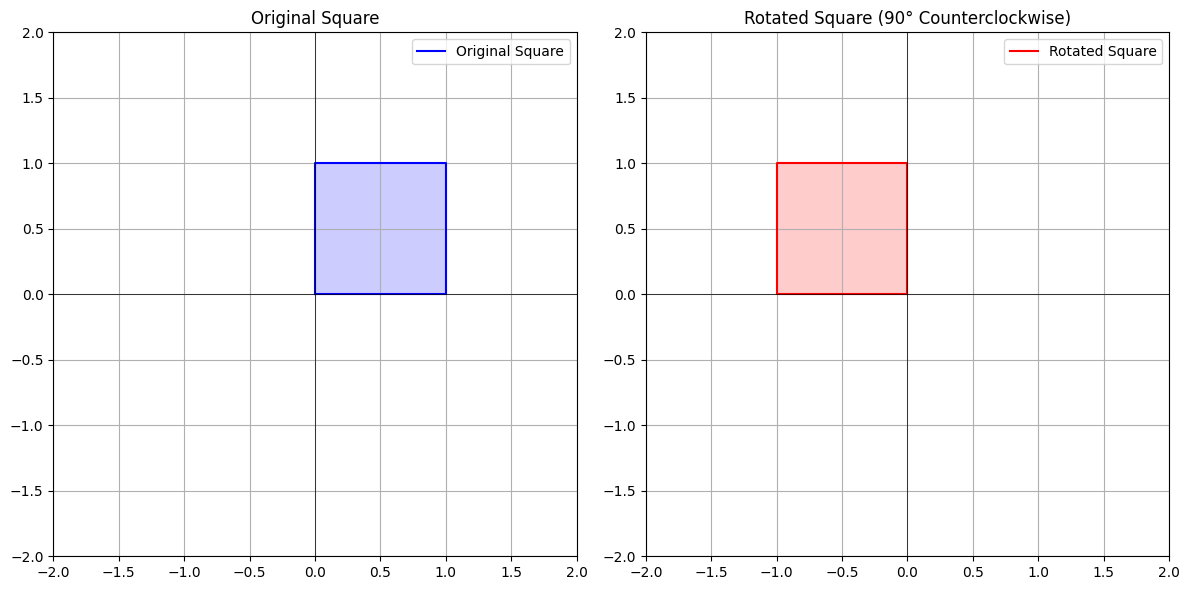

In [5]:
# Visualize the rotation
# Define the rotation matrix for +π/2 (90° counterclockwise)
rotation_90 = np.array([[0, -1], [1, 0]])

# Define a square in 2D space
square = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

# Apply the transformation
transformed_square = np.dot(square, rotation_90.T)
# Visualize the original and rotated square
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original square
axes[0].plot(square[:, 0], square[:, 1], 'b-', label='Original Square')
axes[0].fill(square[:, 0], square[:, 1], 'b', alpha=0.2)
axes[0].axhline(0, color='black', linewidth=0.5)
axes[0].axvline(0, color='black', linewidth=0.5)
axes[0].set_title("Original Square")
axes[0].set_xlim(-2, 2)
axes[0].set_ylim(-2, 2)
axes[0].grid(True)
axes[0].legend()

# Rotated square
axes[1].plot(transformed_square[:, 0], transformed_square[:, 1], 'r-', label='Rotated Square')
axes[1].fill(transformed_square[:, 0], transformed_square[:, 1], 'r', alpha=0.2)
axes[1].axhline(0, color='black', linewidth=0.5)
axes[1].axvline(0, color='black', linewidth=0.5)
axes[1].set_title("Rotated Square (90° Counterclockwise)")
axes[1].set_xlim(-2, 2)
axes[1].set_ylim(-2, 2)
axes[1].grid(True)
axes[1].legend()
plt.tight_layout()
plt.show()

----

# Solution for 2)

$A : \mathbb{R}^2 \to \mathbb{R}^2$: Rotation by the angle $\phi = -\pi/4$ 
    (i.e., $45^\circ$ clockwise).

Uses the same rotation formula as in 1), but with $\phi = -\pi/4$:

In [6]:
# Step 1: Define the rotation matrix for -π/4 (45° clockwise)
rotation_45_cw = Matrix([[cos(-pi/4), -sin(-pi/4)], [sin(-pi/4), cos(-pi/4)]])  # A
identity = Identity(2)  # I

# Step 2: Transpose and multiplication
A_T = rotation_45_cw.T  # Transpose of A
result, latex_str = format_dot_product("A \\cdot A^T", rotation_45_cw, A_T)  # A * A^T
is_identity = identity.equals(result)  # Check if the result is the identity matrix

# Step 3: Check determinant
det_A = det(rotation_45_cw)  # Determinant of A

# Dynamically render all steps
display(Math(format_matrix("A", rotation_45_cw)))  # Display A
display(Math(format_matrix("A^T", A_T)))  # Display A^T
display(Math(latex_str + f"{('=' if is_identity else '\\neq')}" + latex(identity)))  # Display A * A^T
display(Math(format_determinant("A", det_A)))  # Display determinant of A


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

From the above calculation, we can see that the matrix $A$ is orthogonal, as it fulfills the conditions $A^T \cdot A = I$.

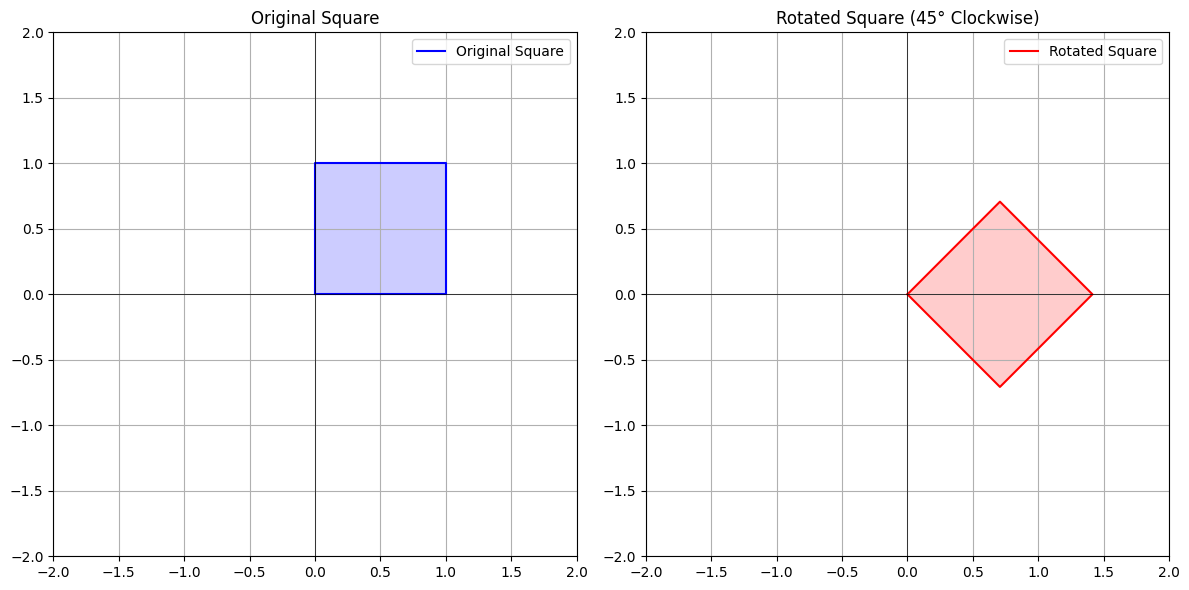

In [7]:
# Visualize the rotation
# Define the rotation matrix for -π/4 (45° clockwise) in numerical form
rotation_45_cw_np = np.array([[np.cos(-np.pi/4), -np.sin(-np.pi/4)],
                              [np.sin(-np.pi/4),  np.cos(-np.pi/4)]])

# Define a square in 2D space
square = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

# Apply the transformation
transformed_square = np.dot(square, rotation_45_cw_np.T)

# Visualize the original and rotated square
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original square
axes[0].plot(square[:, 0], square[:, 1], 'b-', label='Original Square')
axes[0].fill(square[:, 0], square[:, 1], 'b', alpha=0.2)
axes[0].axhline(0, color='black', linewidth=0.5)
axes[0].axvline(0, color='black', linewidth=0.5)
axes[0].set_title("Original Square")
axes[0].set_xlim(-2, 2)
axes[0].set_ylim(-2, 2)
axes[0].grid(True)
axes[0].legend()

# Rotated square
axes[1].plot(transformed_square[:, 0], transformed_square[:, 1], 'r-', label='Rotated Square')
axes[1].fill(transformed_square[:, 0], transformed_square[:, 1], 'r', alpha=0.2)
axes[1].axhline(0, color='black', linewidth=0.5)
axes[1].axvline(0, color='black', linewidth=0.5)
axes[1].set_title("Rotated Square (45° Clockwise)")
axes[1].set_xlim(-2, 2)
axes[1].set_ylim(-2, 2)
axes[1].grid(True)
axes[1].legend()
plt.tight_layout()
plt.show()

----

# Solution for 3)

$A : \mathbb{R}^2 \to \mathbb{R}^2$: Orthogonal projection onto the diagonal 
    $(x = y)$.

The projection onto a line through the origin can be represented as:

$$
A = \frac{1}{||v||^2}\cdot v \cdot v^T,
$$

where $v$ is the unit vector along the line $x=y$. In this case, $v = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$.

In [8]:
# Step 1: Define the projection matrix for x = y (diagonal)
vector = Matrix([1, 1]) # v
vector_length = vector.norm()**2  # v_length
identity = Identity(2)  # I

# Step 2: Calculate the projection matrix
projection_matrix = Rational(1,2) * vector * vector.T  # A

# Step 2: Transpose and multiplication
A_T = projection_matrix.T  # Transpose of A
result, latex_str = format_dot_product("A \\cdot A^T", projection_matrix, A_T)  # A * A^T
is_identity = identity.equals(result)  # Check if the result is the identity matrix

# Step 3: Check determinant
det_A = det(projection_matrix)  # Determinant of A

# Dynamically render all steps
display(Math(format_vector("v", vector)))  # Display v
display(Math("{||v||}^2 = " + f"{vector[0]}^2 + {vector[1]}^2 =" + latex(vector.norm()**2)))  # Display ||v||^2
display(Math(f"A = \\frac{{1}}{{{vector_length}}} \\cdot {latex(vector)} \\cdot {latex(vector.T)} = " 
             + f" \\frac{{1}}{{{vector_length}}} \\cdot" + latex(vector*vector.T) + " ="
             + latex(projection_matrix)))  # Display A
display(Math(format_matrix("A", projection_matrix)))  # Display A
display(Math(format_matrix("A^T", A_T)))  # Display A^T
display(Math(latex_str + f"{('=' if is_identity else '\\neq')}" + latex(identity)))  # Display A * A^T
display(Math(format_determinant("A", det_A)))  # Display determinant of A

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

From the above calculation, we can see that the matrix $A$ is **not** orthogonal, as it does not fulfill the conditions $A^T \cdot A = I$.
Also the projection matrix is idempotent, i.e., $A^2 = A$.

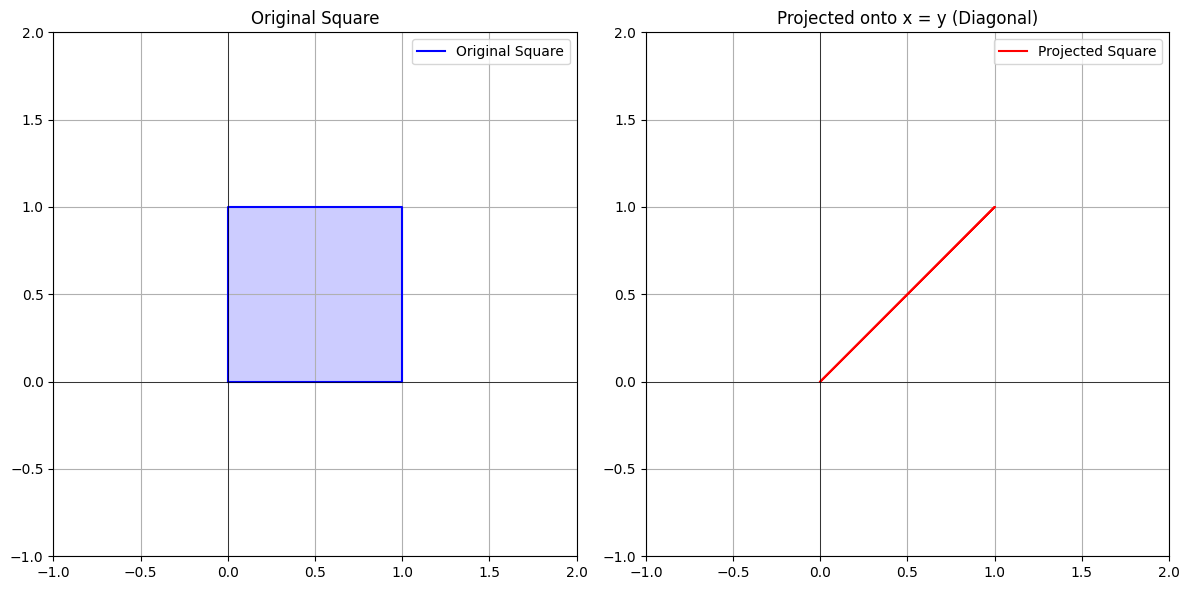

In [9]:
# Visualize the projection
# Define the projection matrix for x = y in numerical form
projection_matrix_np = np.array([[0.5, 0.5], [0.5, 0.5]])

# Define a square in 2D space
square = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

# Apply the transformation
transformed_square = np.dot(square, projection_matrix_np.T)

# Visualize the original and projected square
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original square
axes[0].plot(square[:, 0], square[:, 1], 'b-', label='Original Square')
axes[0].fill(square[:, 0], square[:, 1], 'b', alpha=0.2)
axes[0].axhline(0, color='black', linewidth=0.5)
axes[0].axvline(0, color='black', linewidth=0.5)
axes[0].set_title("Original Square")
axes[0].set_xlim(-1, 2)
axes[0].set_ylim(-1, 2)
axes[0].grid(True)
axes[0].legend()

# Projected square
axes[1].plot(transformed_square[:, 0], transformed_square[:, 1], 'r-', label='Projected Square')
axes[1].fill(transformed_square[:, 0], transformed_square[:, 1], 'r', alpha=0.2)
axes[1].axhline(0, color='black', linewidth=0.5)
axes[1].axvline(0, color='black', linewidth=0.5)
axes[1].set_title("Projected onto x = y (Diagonal)")
axes[1].set_xlim(-1, 2)
axes[1].set_ylim(-1, 2)
axes[1].grid(True)
axes[1].legend()
plt.tight_layout()
plt.show()

----

# Solution for 4)

$A : \mathbb{R}^3 \to \mathbb{R}^3$: Orthogonal reflection about the plane defined by the equation $x = 1$.

**Note:** (4) is an exception: This mapping is not linear since it does not map $(0, 0, 0)$ to $(0, 0, 0)$. 

It is an affine transformation of the form $A \cdot (x, y, z)^T + b$. 

What is the matrix $A$ and the vector $b$?

In [10]:
# Step 1: Define the reflection matrix A and translation vector b
normal_vector_3d = Matrix([1, 0, 0])  # Normal vector of the plane
normal_vector_3d_t = normal_vector_3d.T  # Transpose of the normal vector
normalized_normal_vector = normal_vector_3d / normal_vector_3d.norm()  # Normalized normal vector
translation_vector = Matrix([2, 0, 0])  # Translation vector
identity_raw = Matrix.eye(3)  # 3x3 Identity matrix
identity = Identity(3)  # 3x3 Identity matrix

# Step 2: Calculate reflection matrix
reflection_matrix = identity_raw - (2 * normalized_normal_vector * normalized_normal_vector.T)  # A
A_T = reflection_matrix.T  # Transpose of A


# Step 3: multiplication
result, latex_str = format_dot_product("A \\cdot A^T", reflection_matrix, A_T)  # A * A^T
is_identity = identity.equals(result)  # Check if the result is the identity matrix

# Step 3: Check determinant
det_A = det(projection_matrix)  # Determinant of A

# Dynamically render the matrix and vector
display(Math("||n||^2 = " + latex(normal_vector_3d.norm()) + "^2 = " + latex(normal_vector_3d.norm()**2)))  # Display norm^2 of n
display(Math("A = " + latex(identity) + "- 2 \\cdot n \\cdot n^T = " 
             + latex(identity) + "- 2 \\cdot" + latex(normal_vector_3d) + "\\cdot" + latex(normal_vector_3d_t) + "="
             + latex(identity_raw) + "- 2 \\cdot" + latex(normal_vector_3d*normal_vector_3d_t) + "=" 
             + latex(reflection_matrix)))  # Display A
display(Math(format_vector("b", translation_vector)))  # Display b
# Display the results of orthogonality check
display(Math(format_matrix("A^T", A_T)))  # Display A^T
display(Math(latex_str + f"{('=' if is_identity else '\\neq')}" + latex(identity)))  # Display A * A^T
display(Math(format_determinant("A", det_A)))  # Display determinant of A


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

From the above calculation, we can see that the matrix $A$ is orthogonal, as it fulfills the conditions $A^T \cdot A = I$.

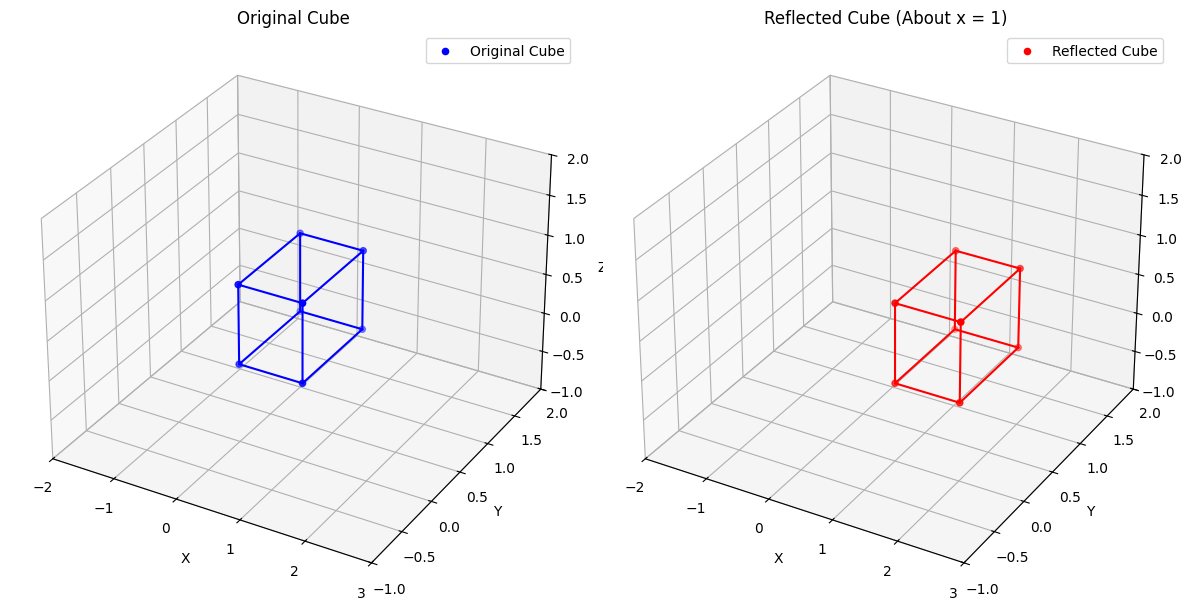

In [11]:
# Step 2: Apply the affine transformation to a cube
# Define a cube in 3D space
cube = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
                 [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]])

# Convert reflection matrix and translation vector to NumPy for numerical operations
reflection_matrix_np = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])
translation_vector_np = np.array([2, 0, 0])

# Apply the transformation
transformed_cube = np.dot(cube, reflection_matrix_np.T) + translation_vector_np

# Step 3: Visualize the original and reflected cube
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# Original cube
ax1.scatter(cube[:, 0], cube[:, 1], cube[:, 2], color='blue', label='Original Cube')
for edge in [(0, 1), (1, 2), (2, 3), (3, 0), (4, 5), (5, 6), (6, 7), (7, 4),
             (0, 4), (1, 5), (2, 6), (3, 7)]:
    ax1.plot(*zip(cube[edge[0]], cube[edge[1]]), color='blue')
ax1.set_title("Original Cube")
ax1.set_xlim([-2, 3])
ax1.set_ylim([-1, 2])
ax1.set_zlim([-1, 2])
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.legend()

# Transformed cube
ax2.scatter(transformed_cube[:, 0], transformed_cube[:, 1], transformed_cube[:, 2], color='red', label='Reflected Cube')
for edge in [(0, 1), (1, 2), (2, 3), (3, 0), (4, 5), (5, 6), (6, 7), (7, 4),
             (0, 4), (1, 5), (2, 6), (3, 7)]:
    ax2.plot(*zip(transformed_cube[edge[0]], transformed_cube[edge[1]]), color='red')
ax2.set_title("Reflected Cube (About x = 1)")
ax2.set_xlim([-2, 3])
ax2.set_ylim([-1, 2])
ax2.set_zlim([-1, 2])
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")
ax2.legend()

plt.tight_layout()
plt.show()

----

# Solution for 5)

$A : \mathbb{R}^3 \to \mathbb{R}^3$: $(x, y, z)^T$ is mapped to $(z, y/2, x/3)^T$.

$A = \begin{bmatrix} 0 & 0 & 1 \\ 0 & 1/2 & 0 \\ 1/3 & 0 & 0 \end{bmatrix}$.

In [12]:
# Step 1: Define the transformation matrix
x,y,z = symbols('x y z')
transformation_matrix_sym = Matrix([x,y,z])
transformation_mapping = Matrix([z, y/2, x/3])
transformation_matrix = Matrix([[0, 0, 1], [0, Rational(1,2), 0], [Rational(1,3), 0, 0]])
identity = Identity(3)  # 3x3 Identity matrix

# Step 2: Compute the transpose of A and A * A^T
A_T = transformation_matrix.T  # Transpose of A
result, latex_str = format_dot_product("A \\cdot A^T", transformation_matrix, A_T)  # A * A^T
is_identity = identity.equals(result)  # Check if the result is the identity matrix

# Step 3: Check determinant
det_A = det(projection_matrix)  # Determinant of A

# Step 4: Dynamically render the transformation matrix, transpose, and orthogonality check
display(Math(latex(transformation_matrix_sym) + "\\Rightarrow" + latex(transformation_mapping)))  # Display transformation mapping
display(Math(latex(transformation_mapping) + "= A \\cdot" + latex(transformation_matrix_sym)))  # Display transformation
display(Math(format_matrix("A", transformation_matrix)))  # Display A
display(Math(format_matrix("A^T", A_T)))  # Display A^T
display(Math(latex_str + f"{('=' if is_identity else '\\neq')}" + latex(identity)))  # Display A * A^T
display(Math(format_determinant("A", det_A)))  # Display determinant of A


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

From the above calculation, we can see that the matrix $A$ is **not** orthogonal, as it does not fulfill the conditions $A^T \cdot A = I$.

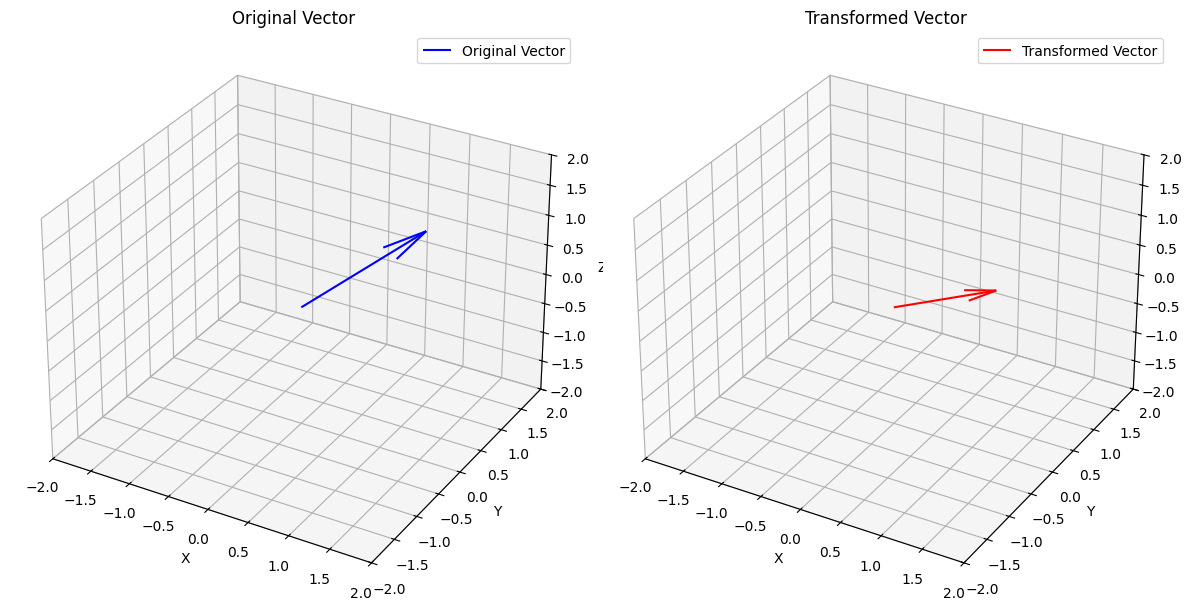

In [13]:
# Visualize the transformation
# Define a 3D vector in space
vector = np.array([1, 1, 1])

# Transformation matrix
transformation_matrix_np = np.array([[0, 0, 1], [0, 0.5, 0], [1/3, 0, 0]])

# Apply the transformation
transformed_vector = np.dot(transformation_matrix_np, vector)

# Visualize the original and transformed vector
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# Original vector
ax1.quiver(0, 0, 0, vector[0], vector[1], vector[2], color='blue', label='Original Vector')
ax1.set_title("Original Vector")
ax1.set_xlim([-2, 2])
ax1.set_ylim([-2, 2])
ax1.set_zlim([-2, 2])
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.legend()

# Transformed vector
ax2.quiver(0, 0, 0, transformed_vector[0], transformed_vector[1], transformed_vector[2], color='red', label='Transformed Vector')
ax2.set_title("Transformed Vector")
ax2.set_xlim([-2, 2])
ax2.set_ylim([-2, 2])
ax2.set_zlim([-2, 2])
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")
ax2.legend()

plt.tight_layout()
plt.show()
